In [1]:
import numpy as np
import matplotlib.pyplot as plt
import primed_utils
from primed_data_processing.cellbuilder import CellBuilder

# Import Data

In [2]:
# instantiate CellBuilder
cell_builder = CellBuilder()

# raws_prepath = 'path/to/raws/'
raws_prepath = 'C:/Users/seanb/OneDrive/Documents/PRIMED/export/batdat/MTC/raws/'

# all channel and cell numbers from B6 in order
channel_numbers = (1,2,3,4,9,10,11,12,13,14,15,16)
cell_numbers = (9,10,11,12,1,2,3,4,5,6,7,8)
steps = {'characterization': [6,10]}

# load Arbin data
batch = primed_utils.load_B6T10(cell_builder, raws_prepath, channel_numbers, cell_numbers, steps)

Processing channel 1
Processing channel 2
Processing channel 3
Processing channel 4
Processing channel 9
Processing channel 10
Processing channel 11
Processing channel 12
Processing channel 13
Processing channel 14
Processing channel 15
Processing channel 16


# Data Processing

In [40]:
# calculate and assing SOH's to all of the steps
primed_utils.assign_cell_cycle_numbers(batch)
primed_utils.assign_soh(6, 10, 4, batch)
primed_utils.assign_soh(10, 10, 4, batch)

# filter into bins of 1% soh
step6_filtered = primed_utils.filter_by_soh(batch[:,:,6], 1, soh_lower=69)
step10_filtered = primed_utils.filter_by_soh(batch[:,:,10], 1, soh_lower=69)

# Plotting Functions

In [35]:
def plot_ocv(step, feature, nom_cap):
    plt.plot(np.array(step[feature])/nom_cap, step['Voltage(V)'])
    plt.xlabel('SOC')
    plt.ylabel('Voltage')
    plt.xlim(0,1)

def plot_ocvs(steps, feature, nom_cap):
    plt.figure()
    for step in steps:
        plt.plot(np.array(step[feature])/nom_cap, step['Voltage(V)'], label=f"{step.soh} {step.channel_number}")
    plt.xlabel('SOC')
    plt.ylabel('Voltage')
    plt.xlim(0,1)
    plt.legend()

def plot_ocv_array(filtered_steps, feature, nom_cap,save=False):
    nrows = int(len(filtered_steps.keys()) / 4)
    ncols = 4

    col_labels = [f"SOC" for j in range(ncols)]

    for i, key in enumerate(filtered_steps.keys()):
        if i % ncols == 0:
            fig, ax = plt.subplots(1, ncols, sharey='row', figsize=(20, 9))

            for ax_col, col_label in zip(ax, col_labels):
                ax_col.annotate(col_label, xy=(0.5, 1.1), xycoords='axes fraction',
                                ha='center', va='center', fontsize=12)

        col = i % ncols

        for step in filtered_steps[key]:
            ax[col].plot(np.array(step[feature]) / nom_cap, step['Voltage(V)'],
                         label=f"SOH: {round(step.soh, 2)} Chan: {step.channel_number}")

        if i % ncols == 3:
            ax[0].set_ylabel("Voltage (V)")
            for ax in fig.axes:
                ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=2)

            plt.tight_layout()
            if save:
                plt.savefig(f"C:\\Users\\seanb\\repos\\battery_sizing_model\\Images\\discharge_by_soh{i//4 + 1}.png")
    plt.show()
    
    

# Inspect OCV Curves

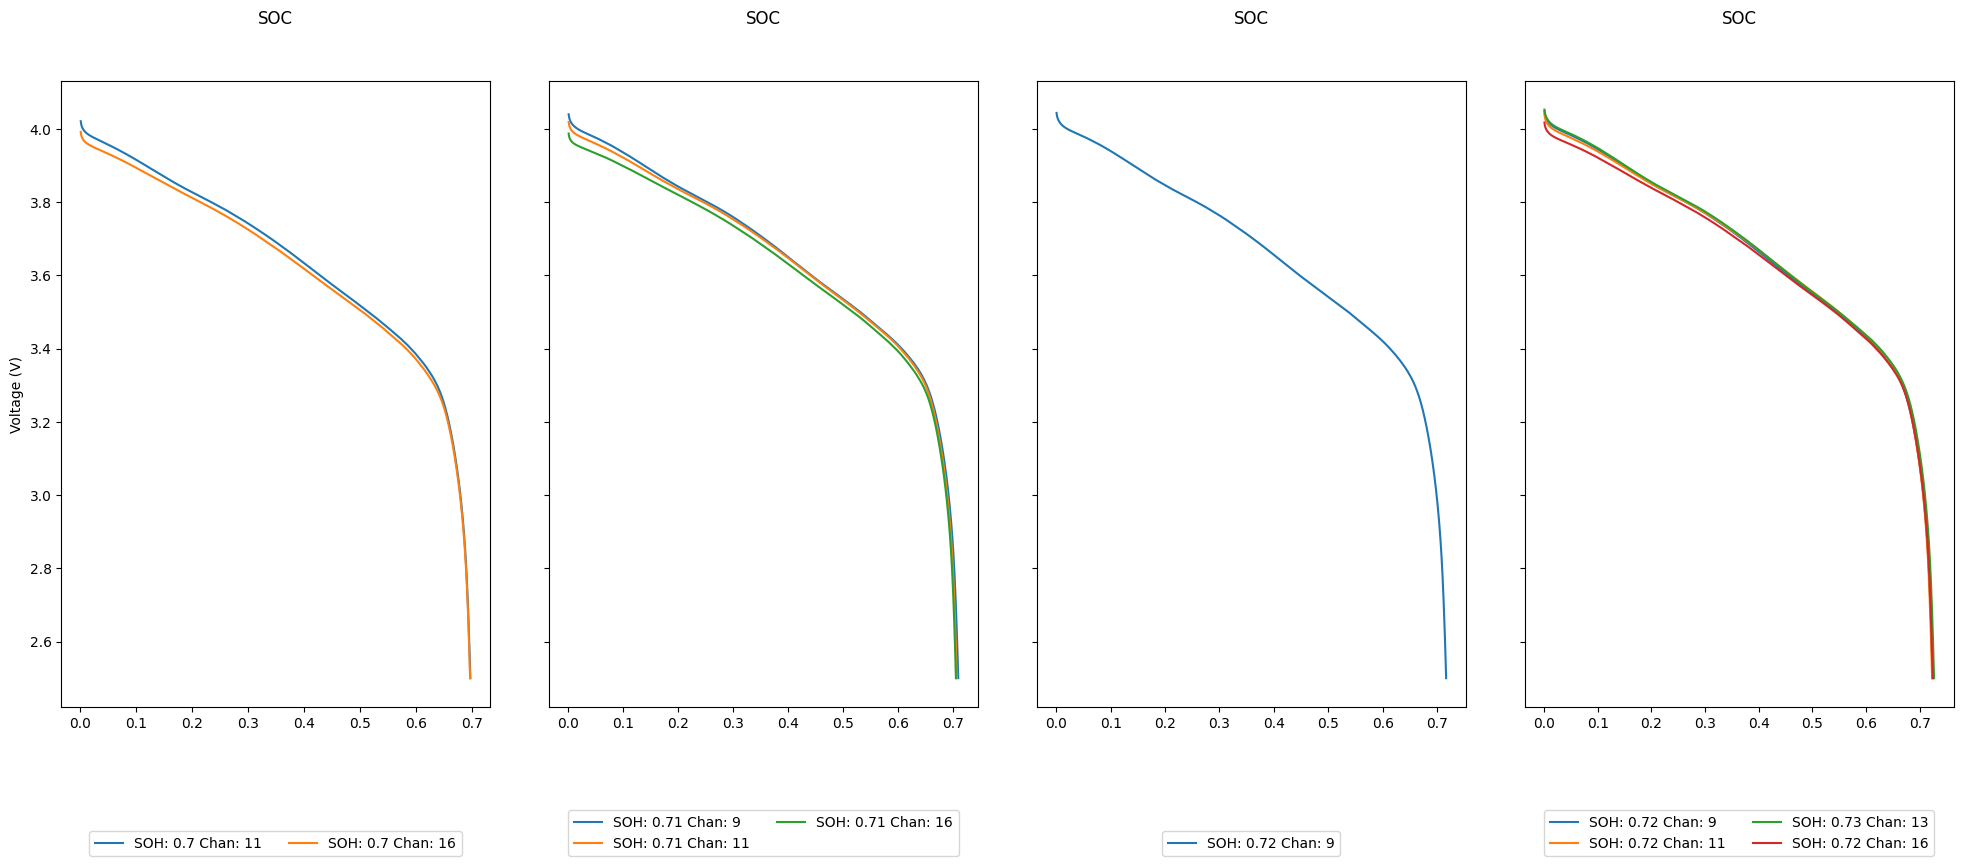

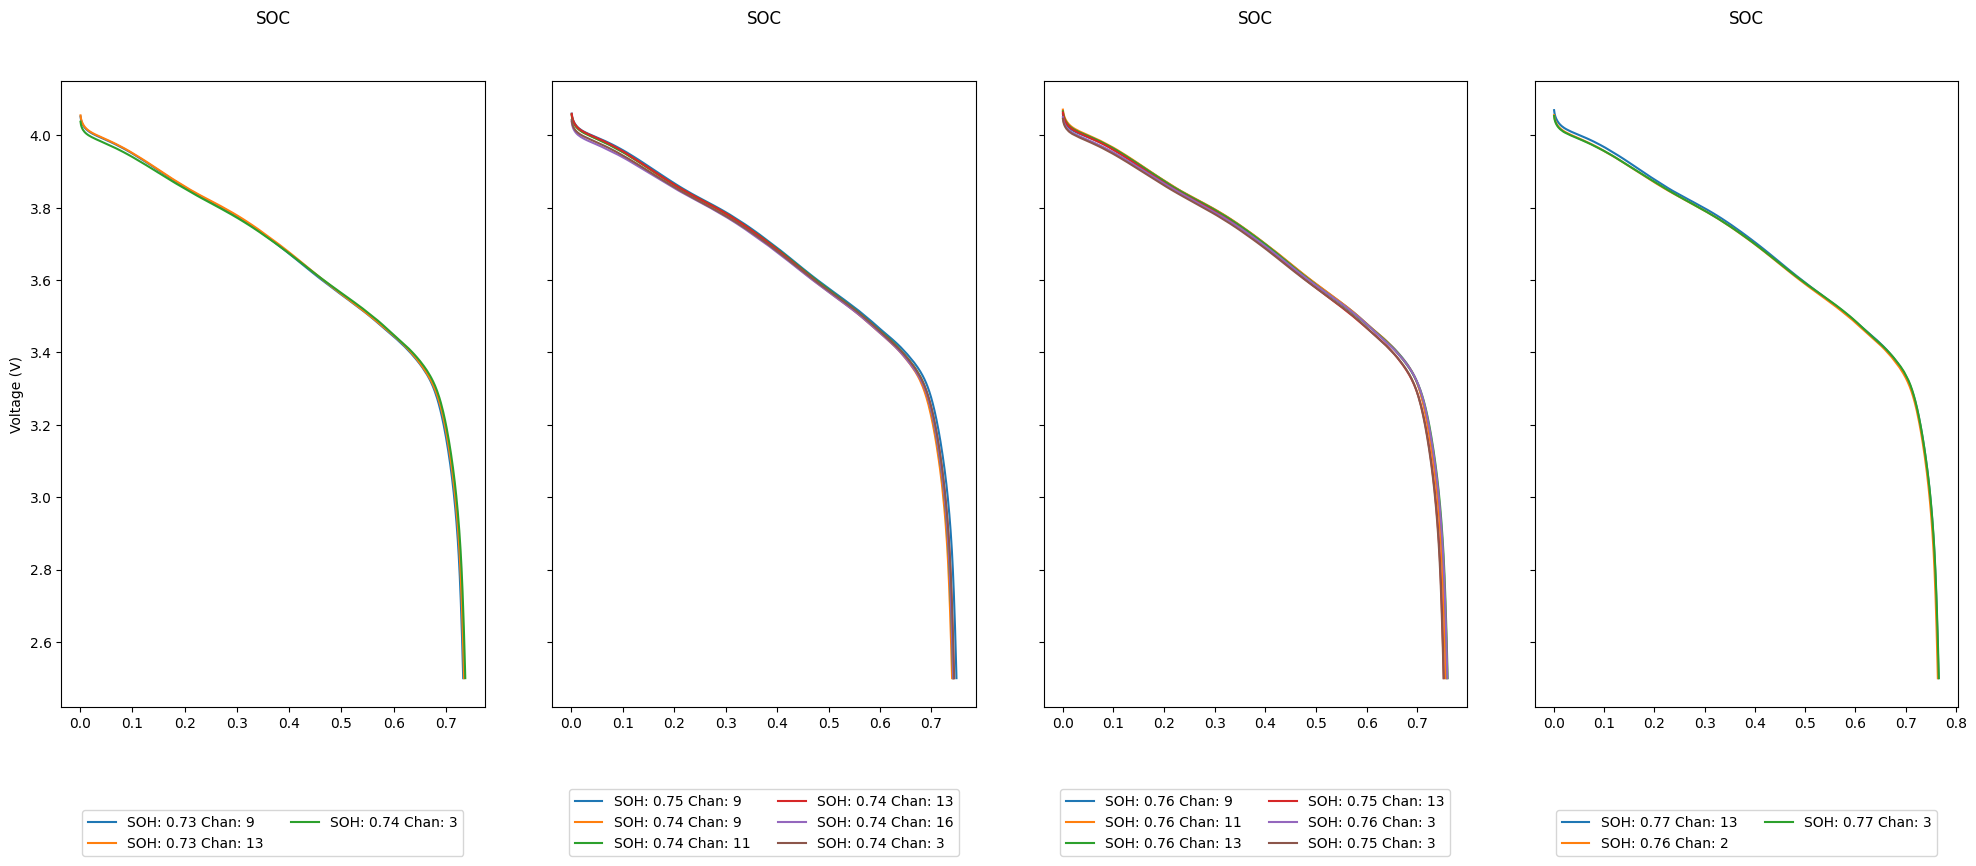

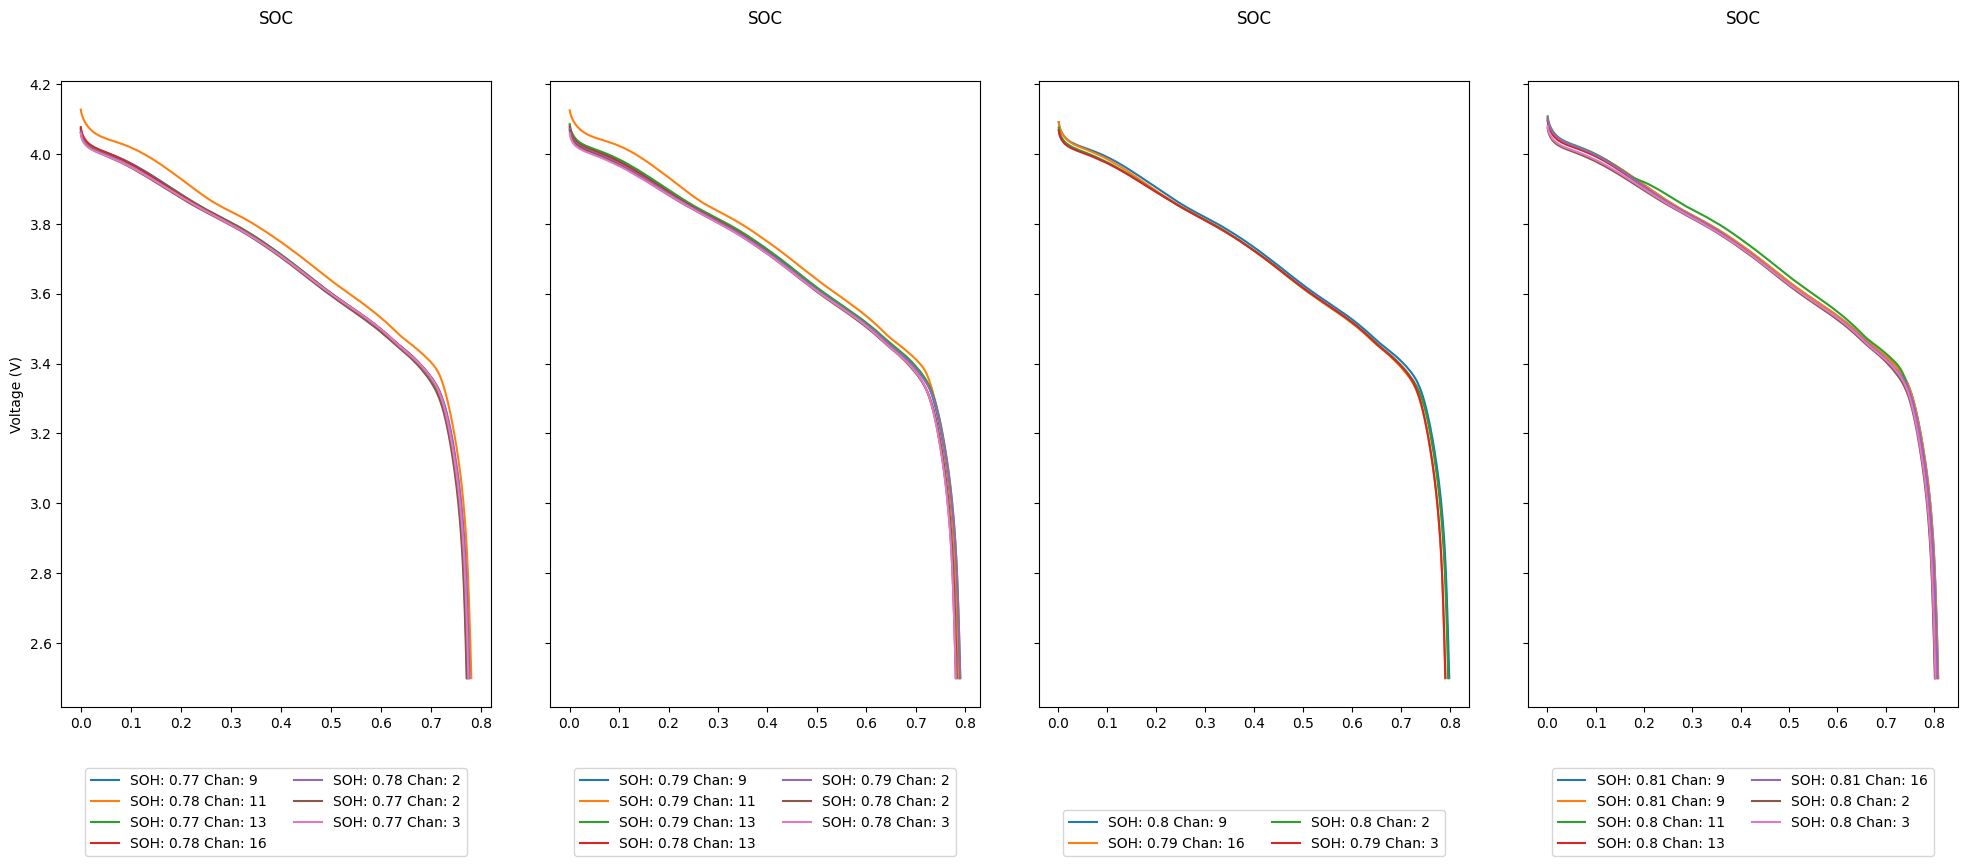

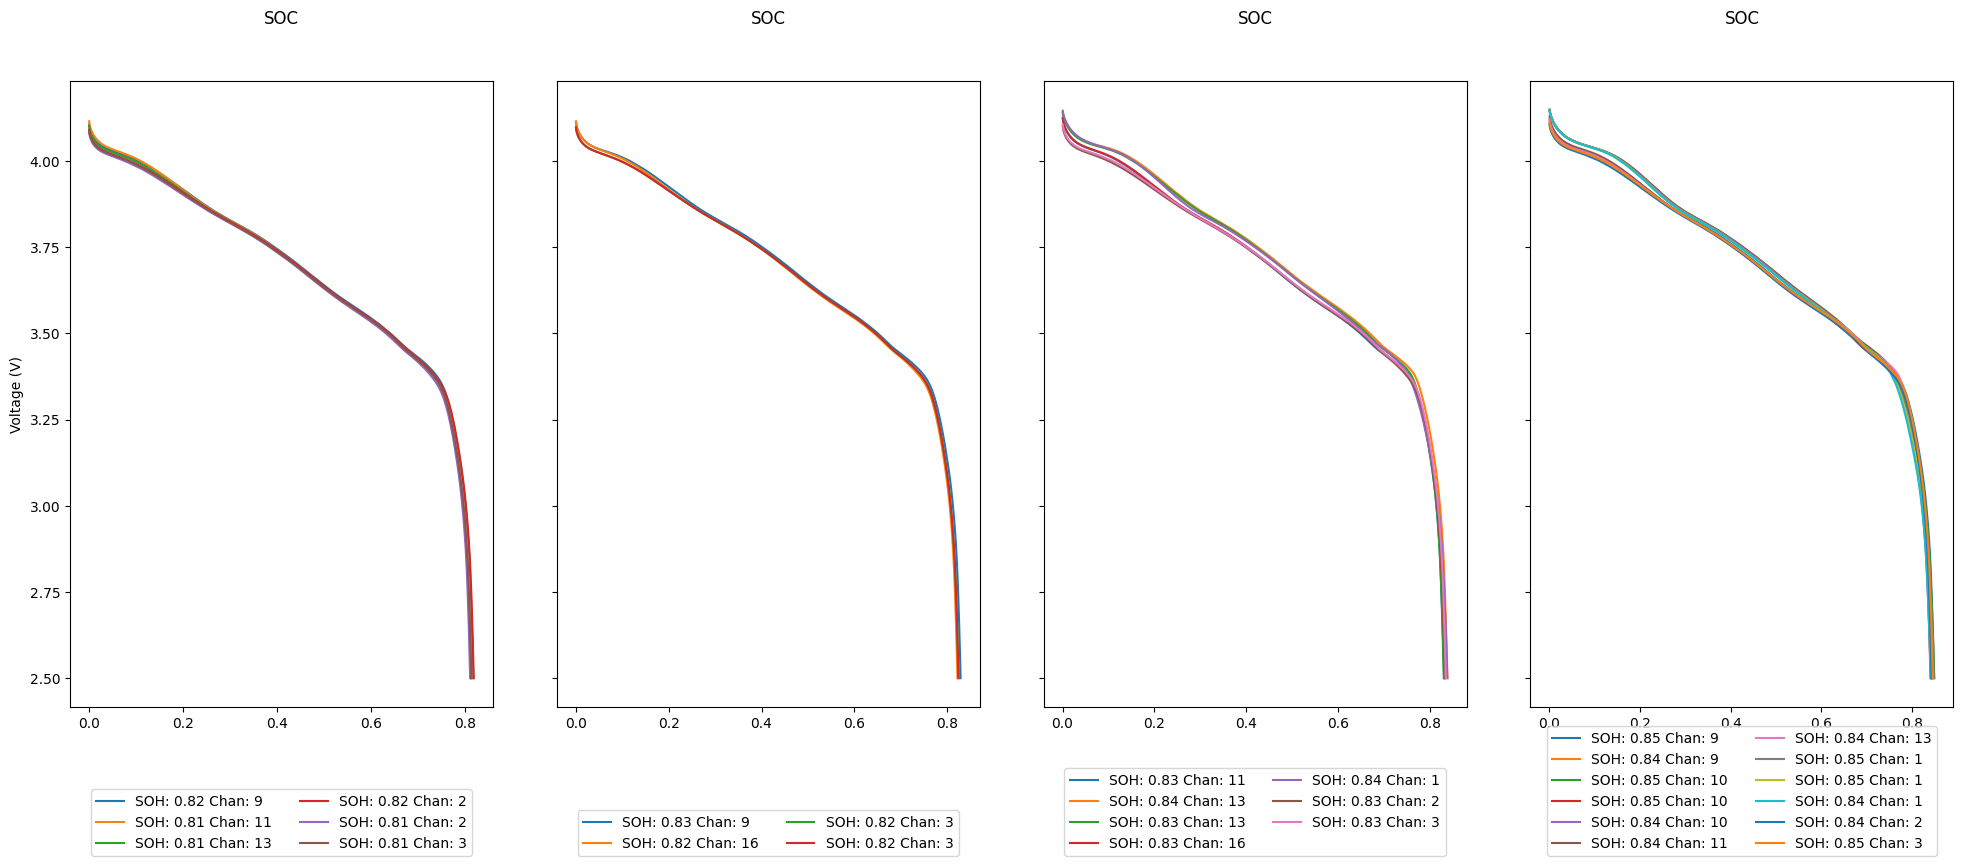

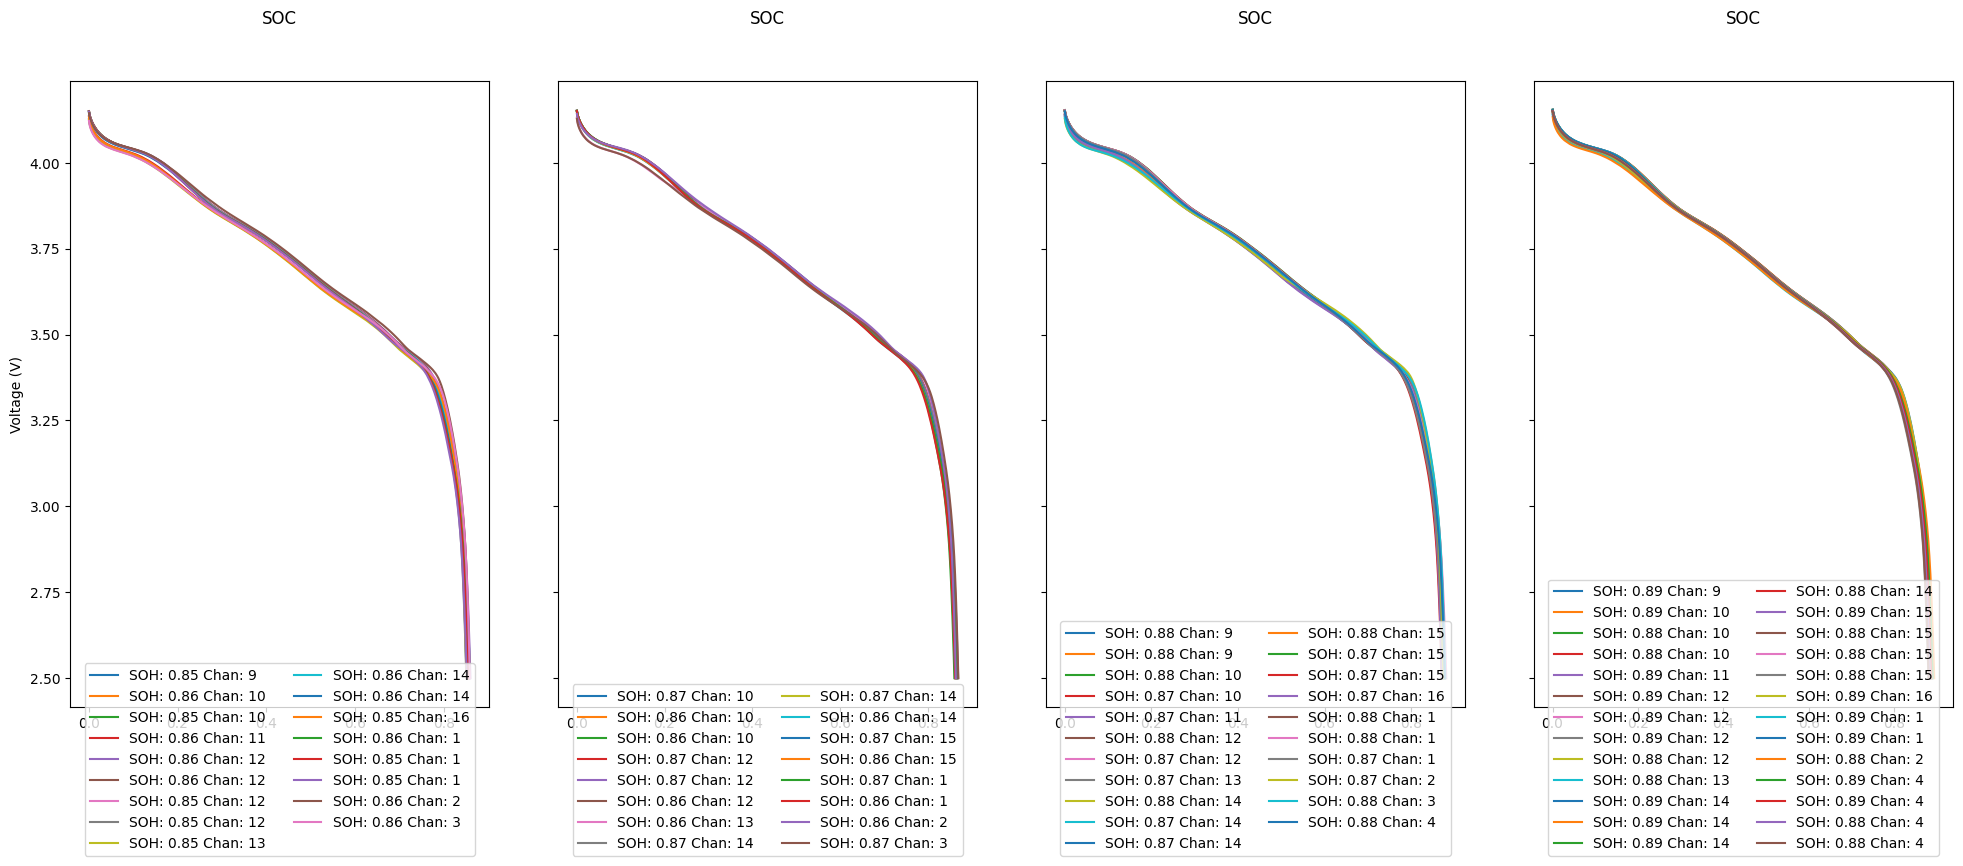

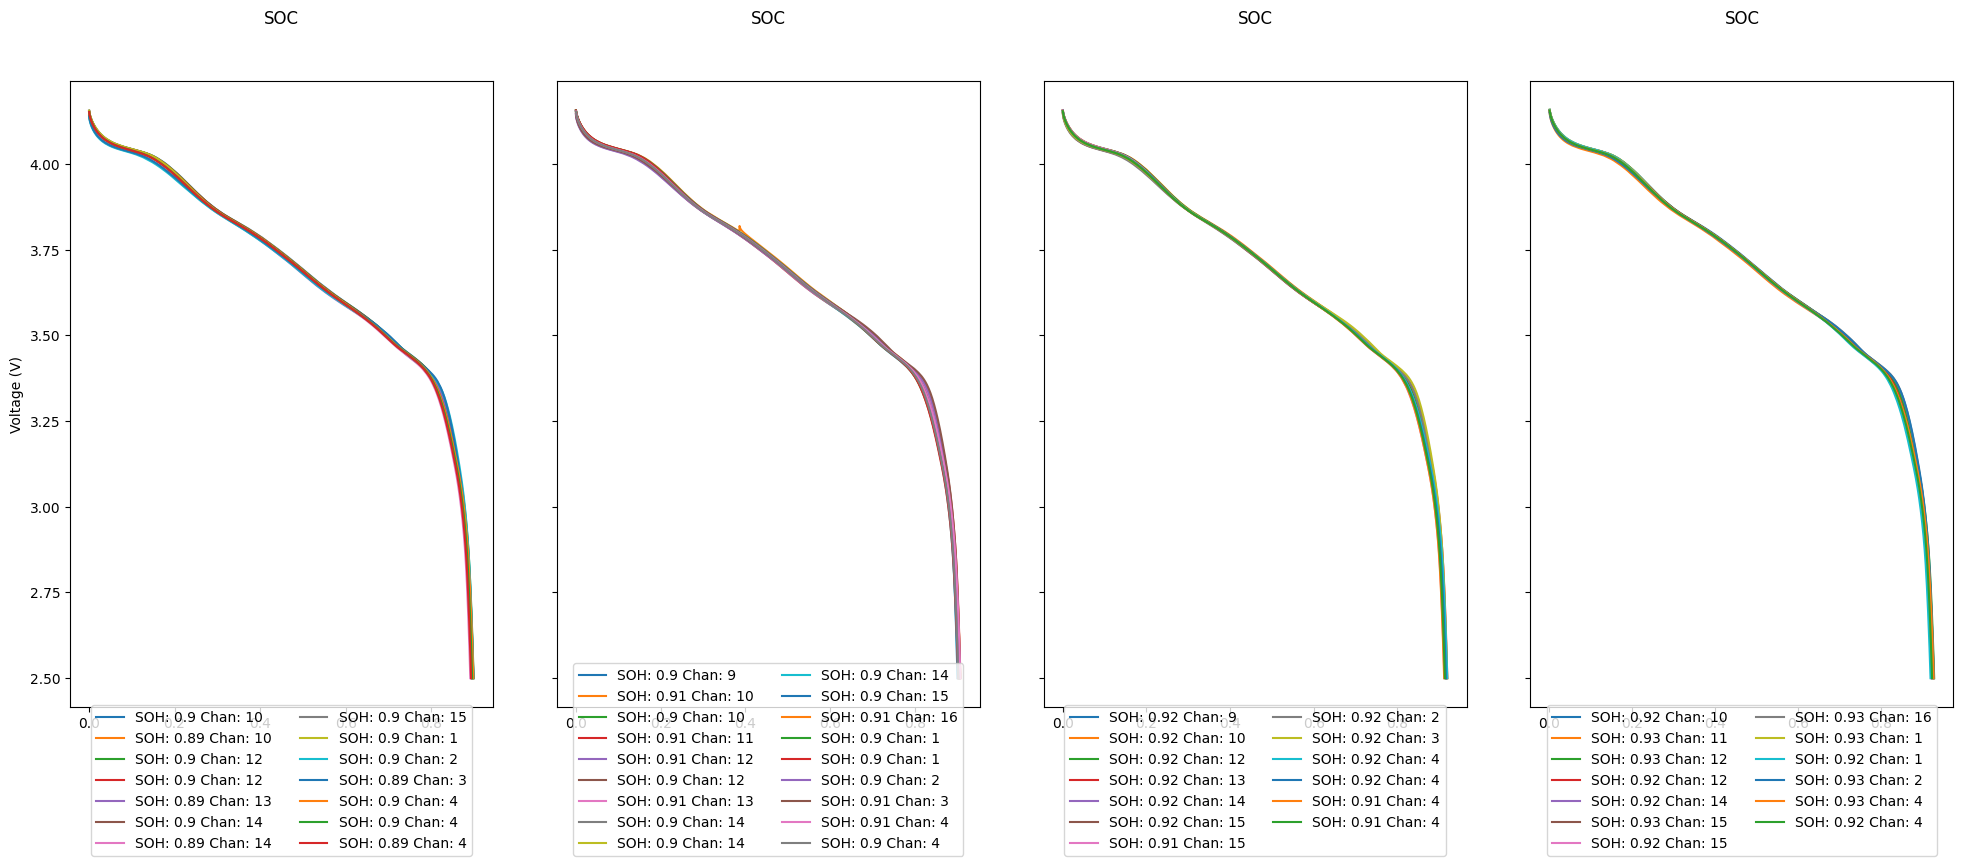

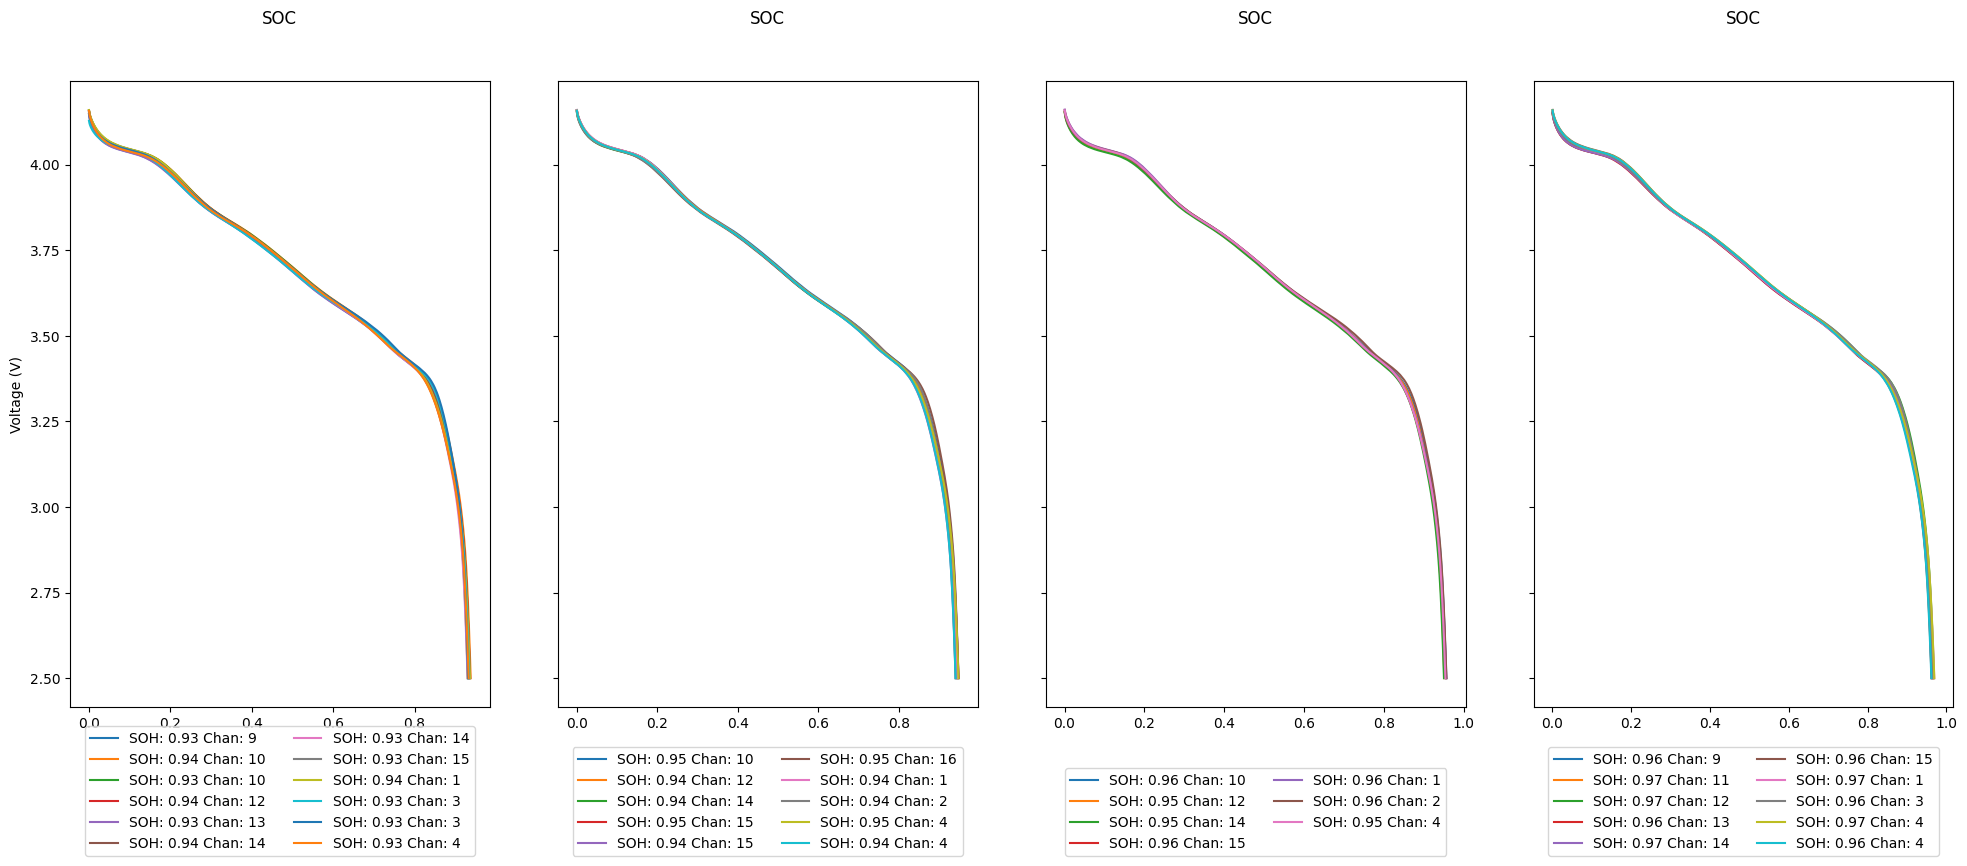

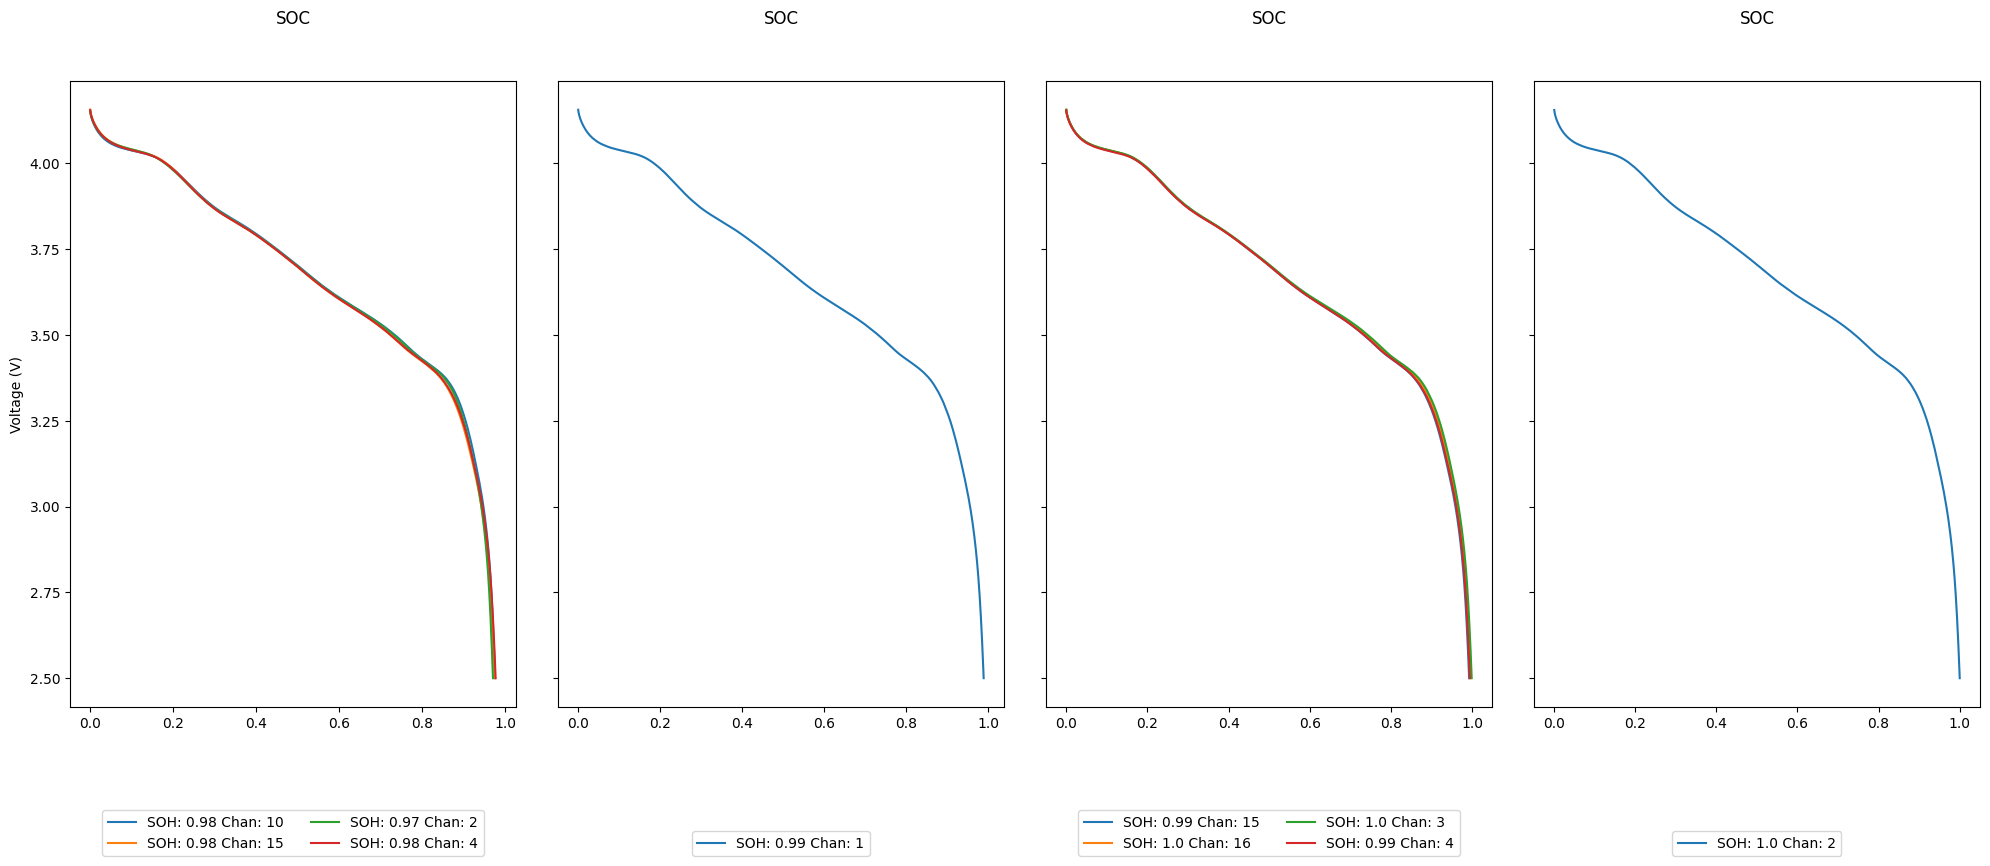

In [41]:
plot_ocv_array(step10_filtered,"Discharge_Capacity(Ah)",4)

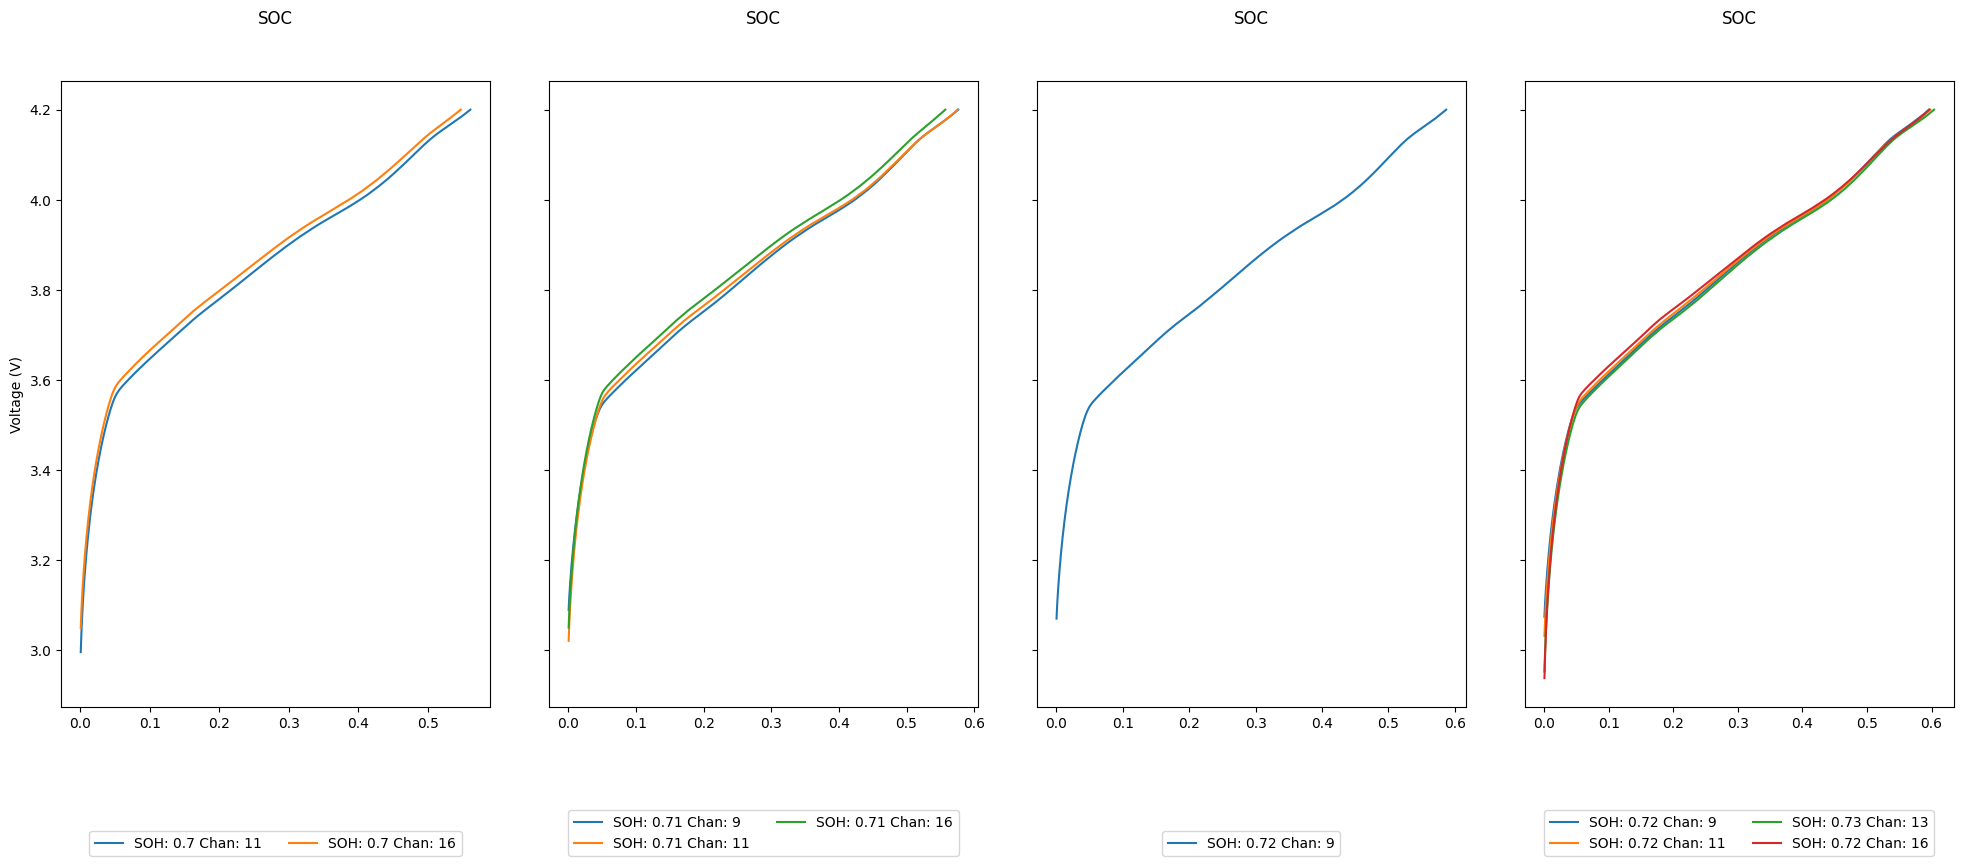

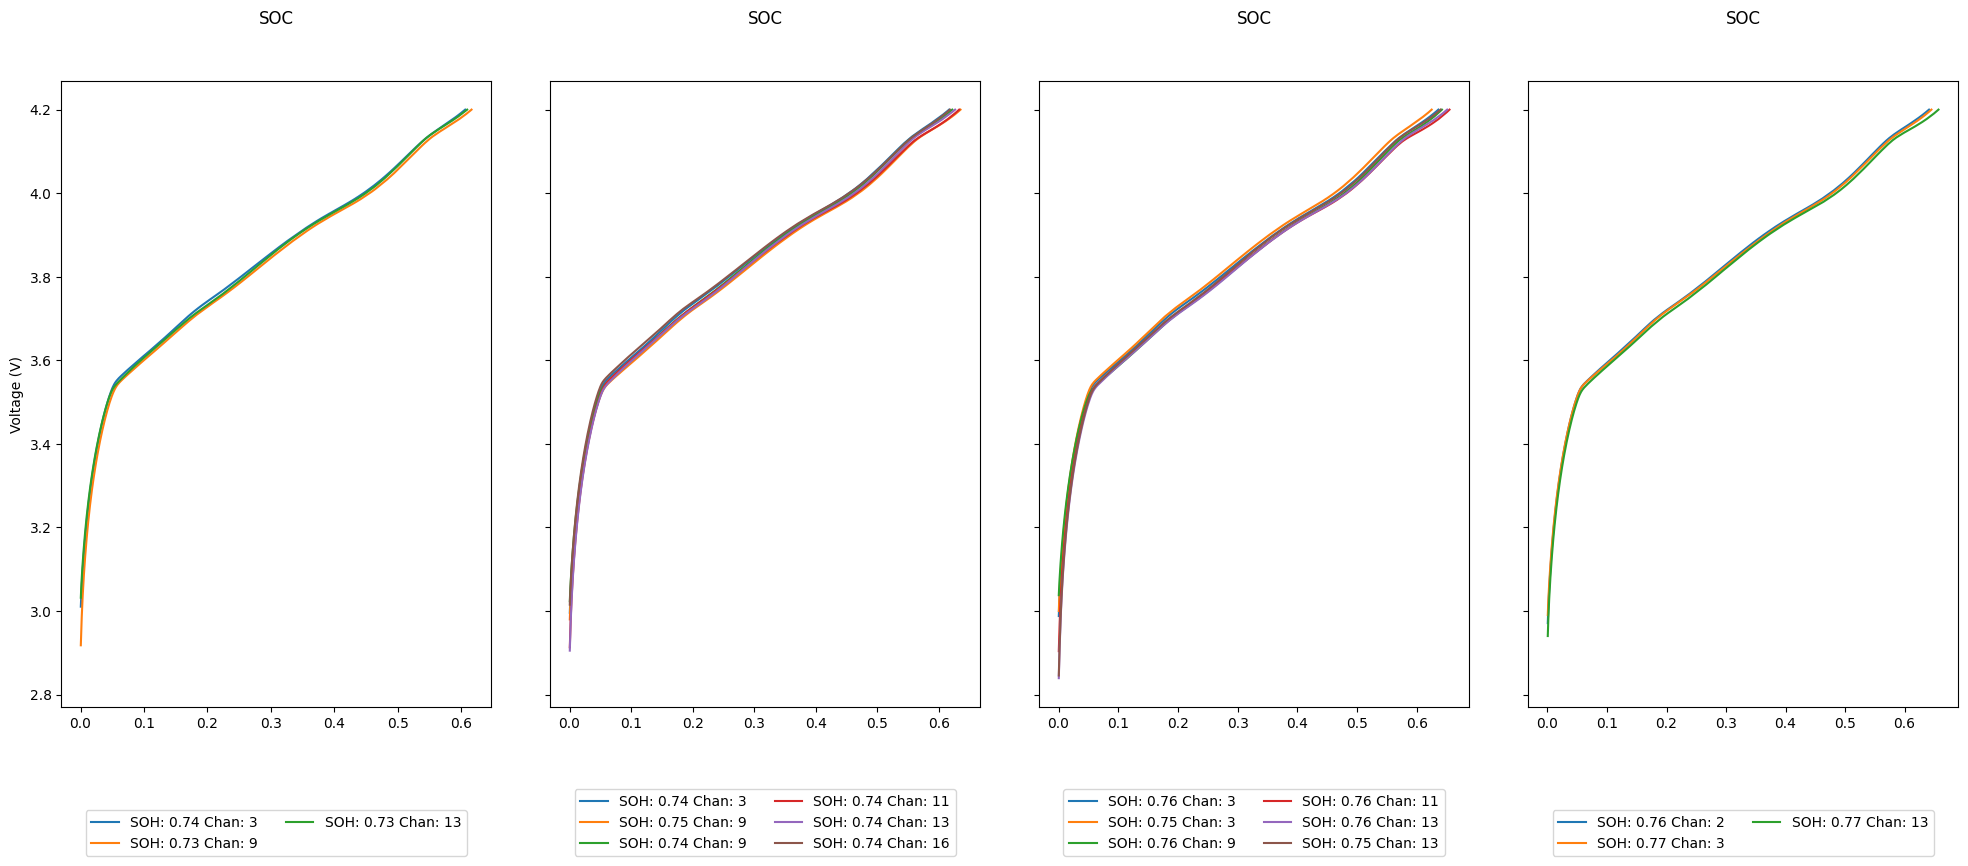

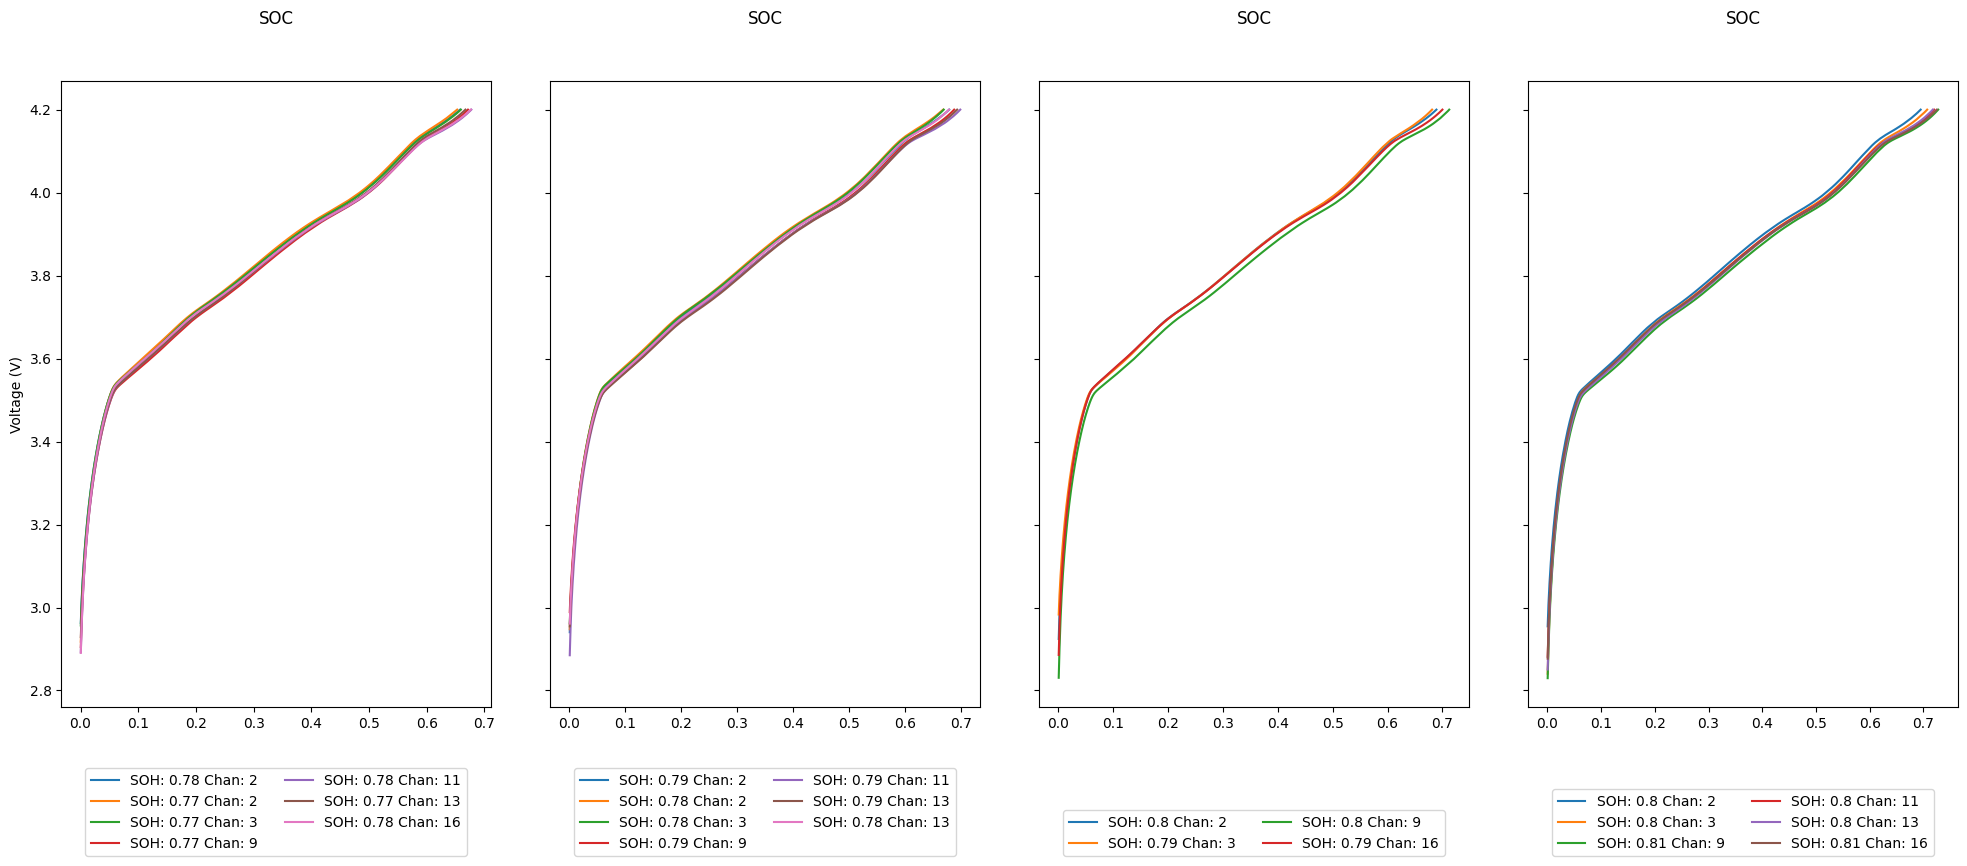

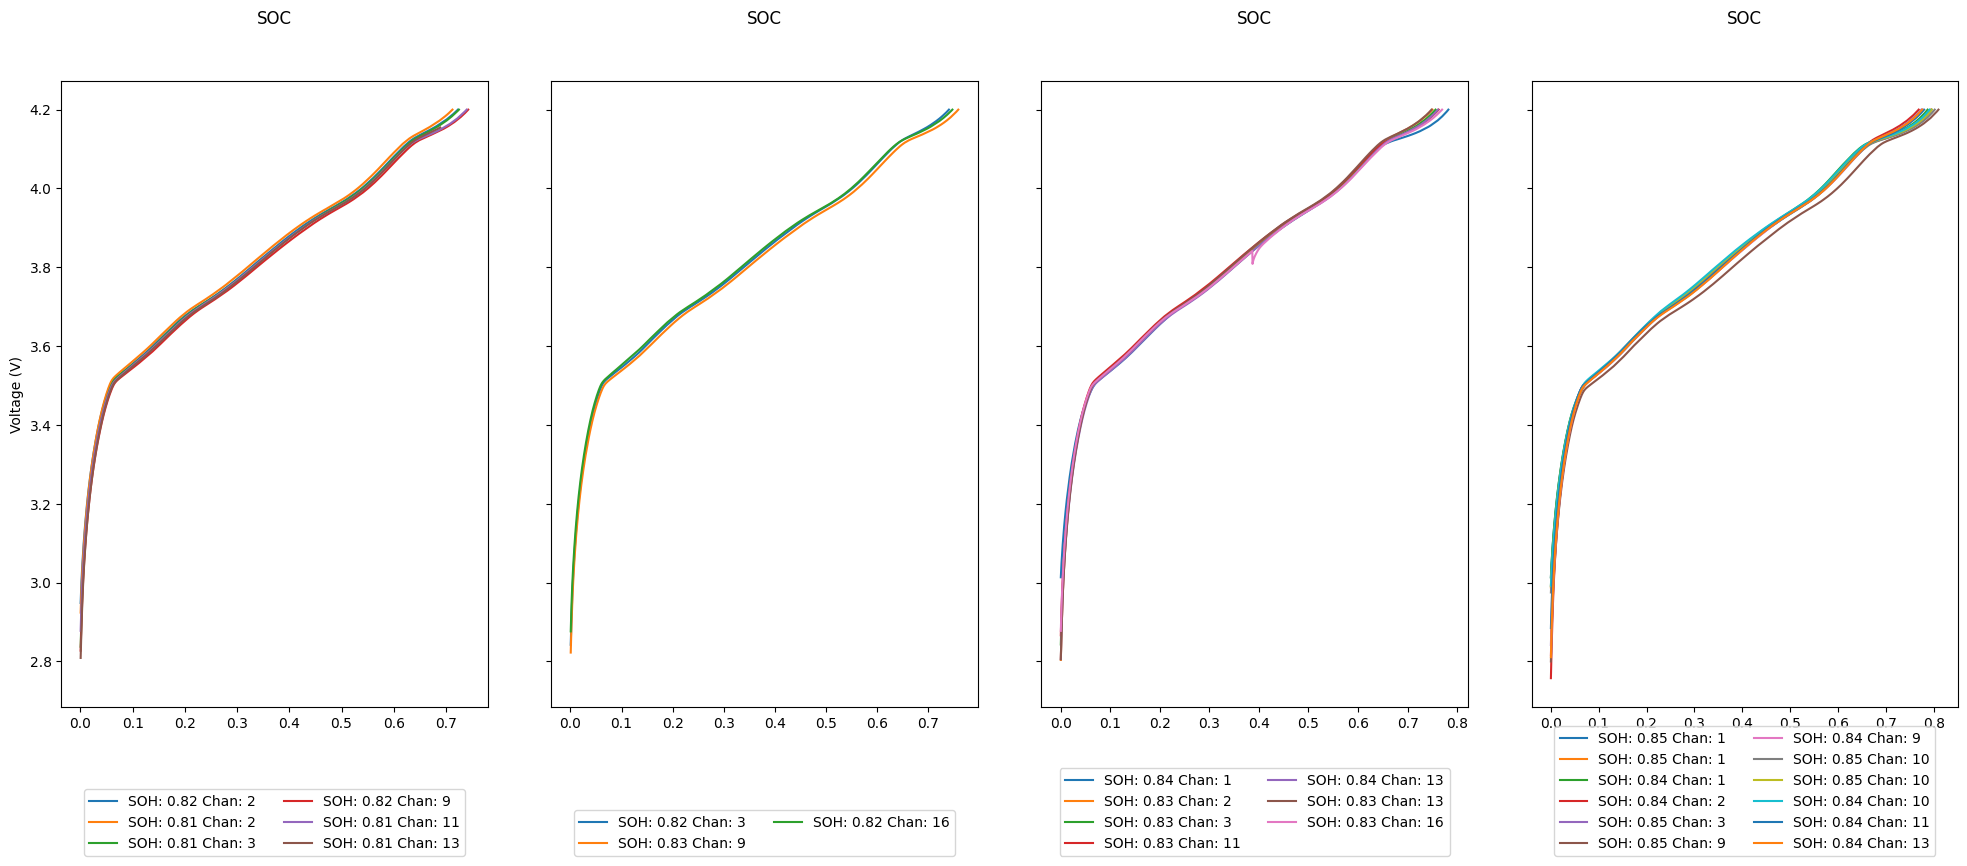

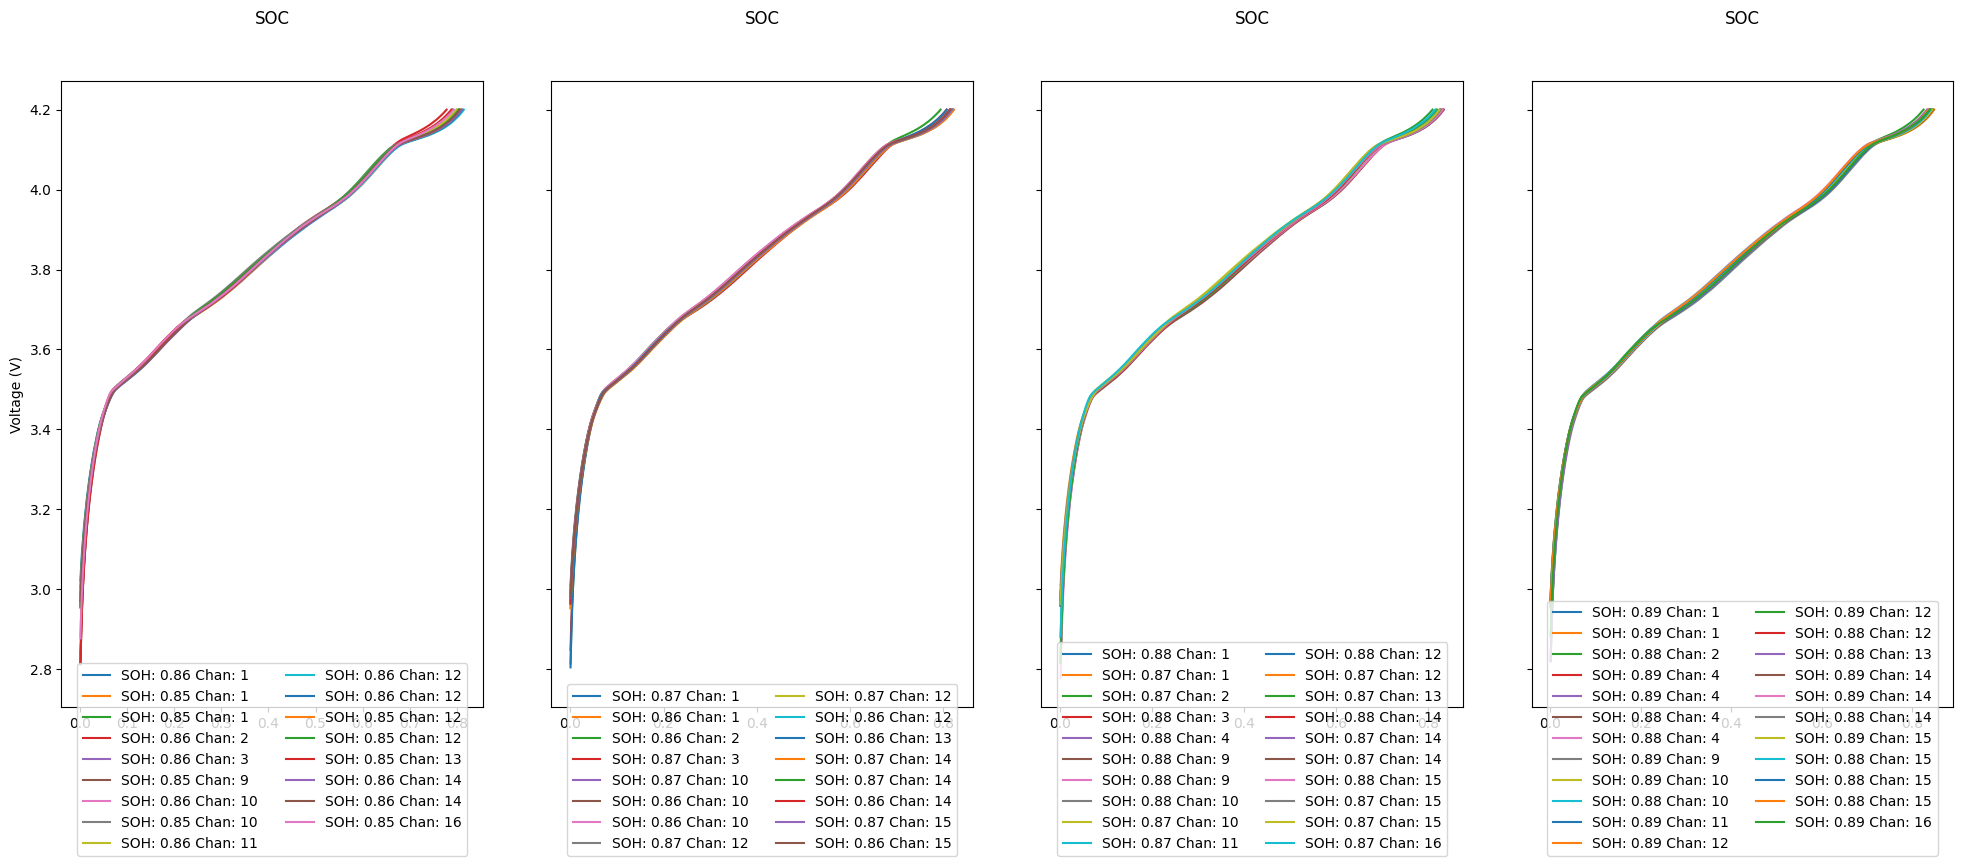

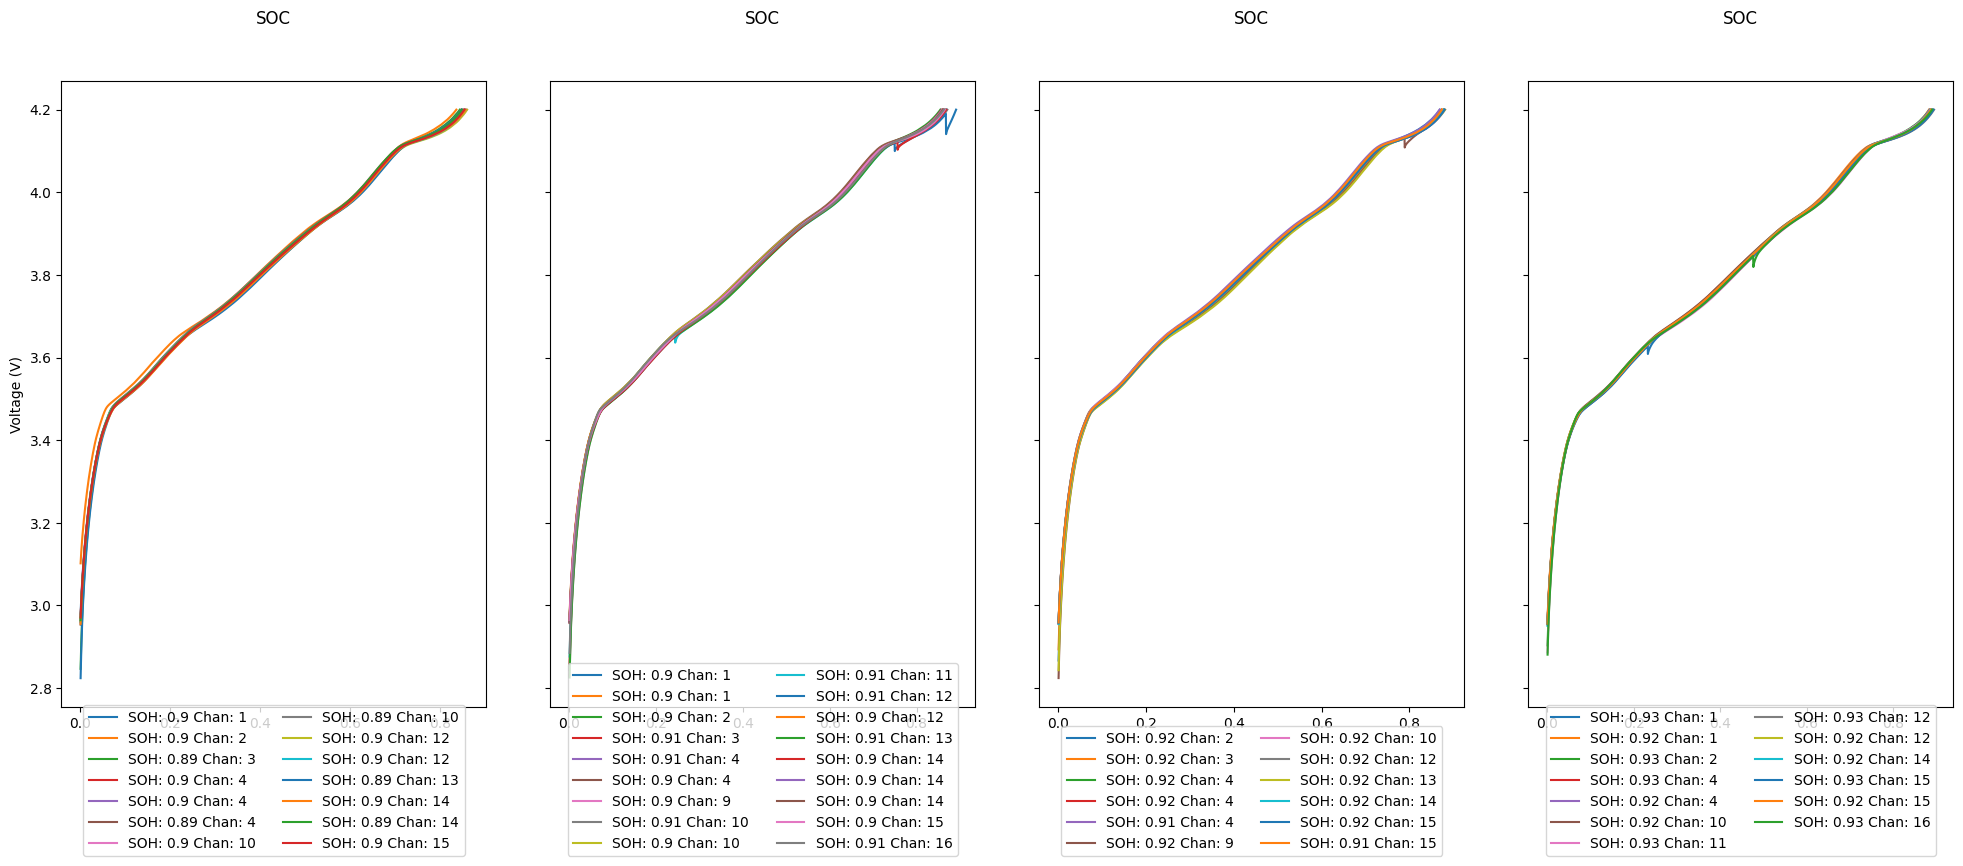

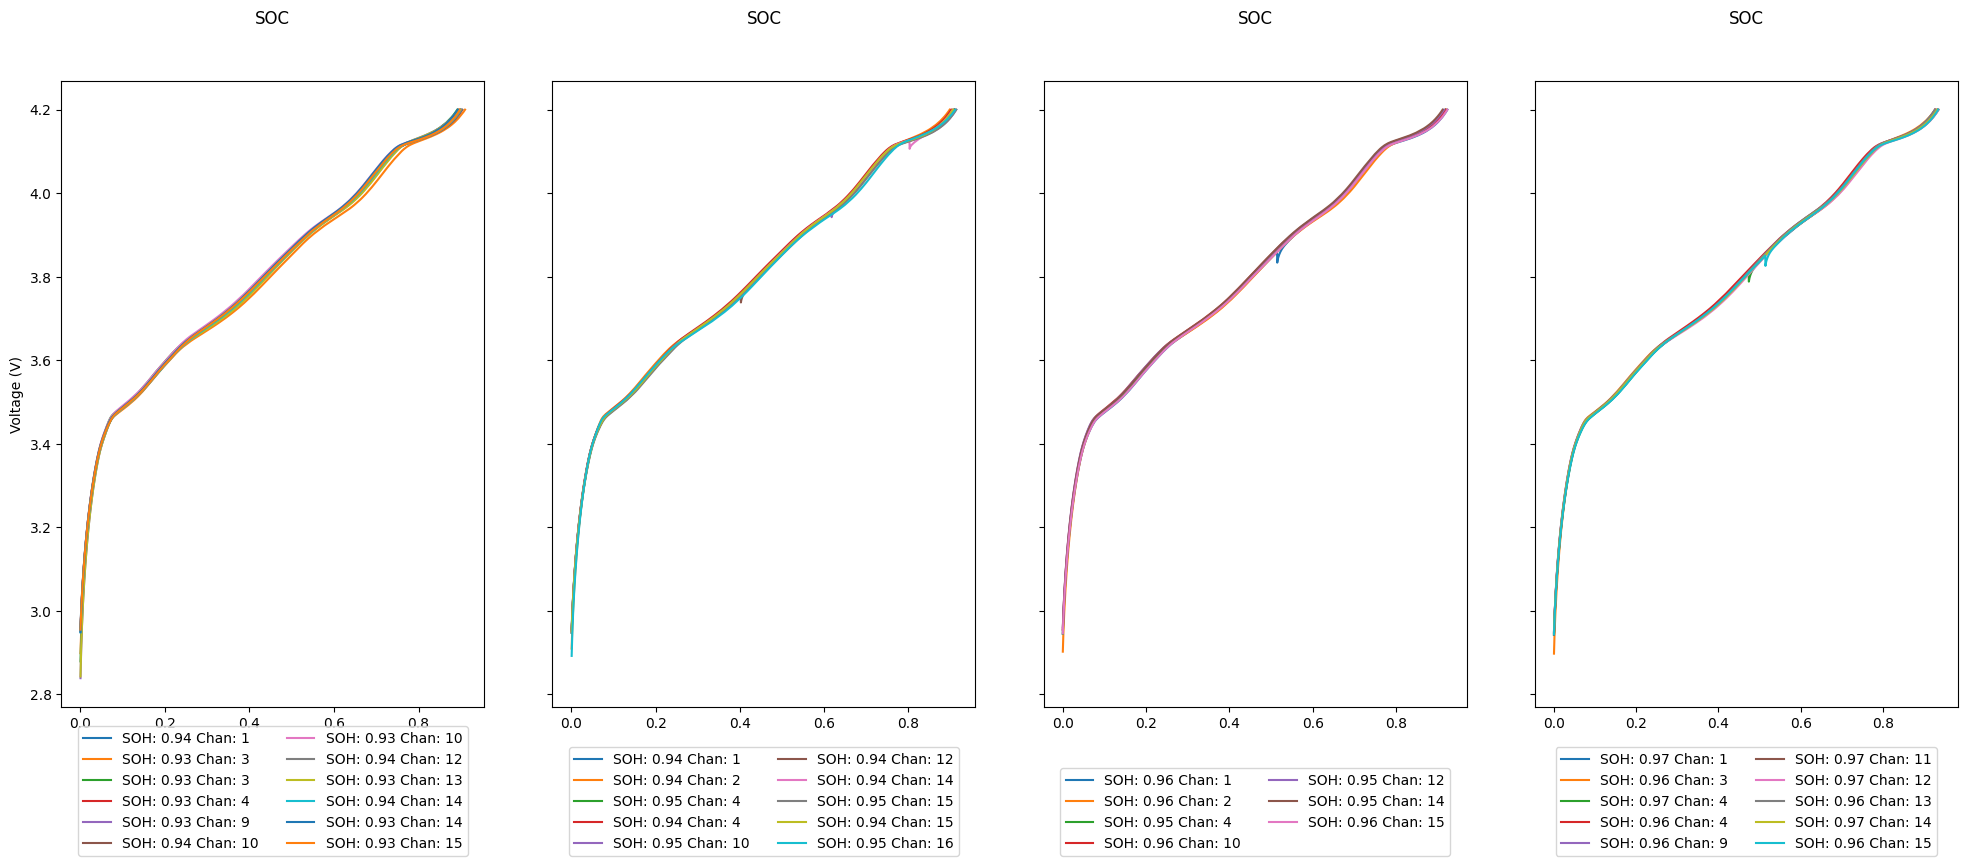

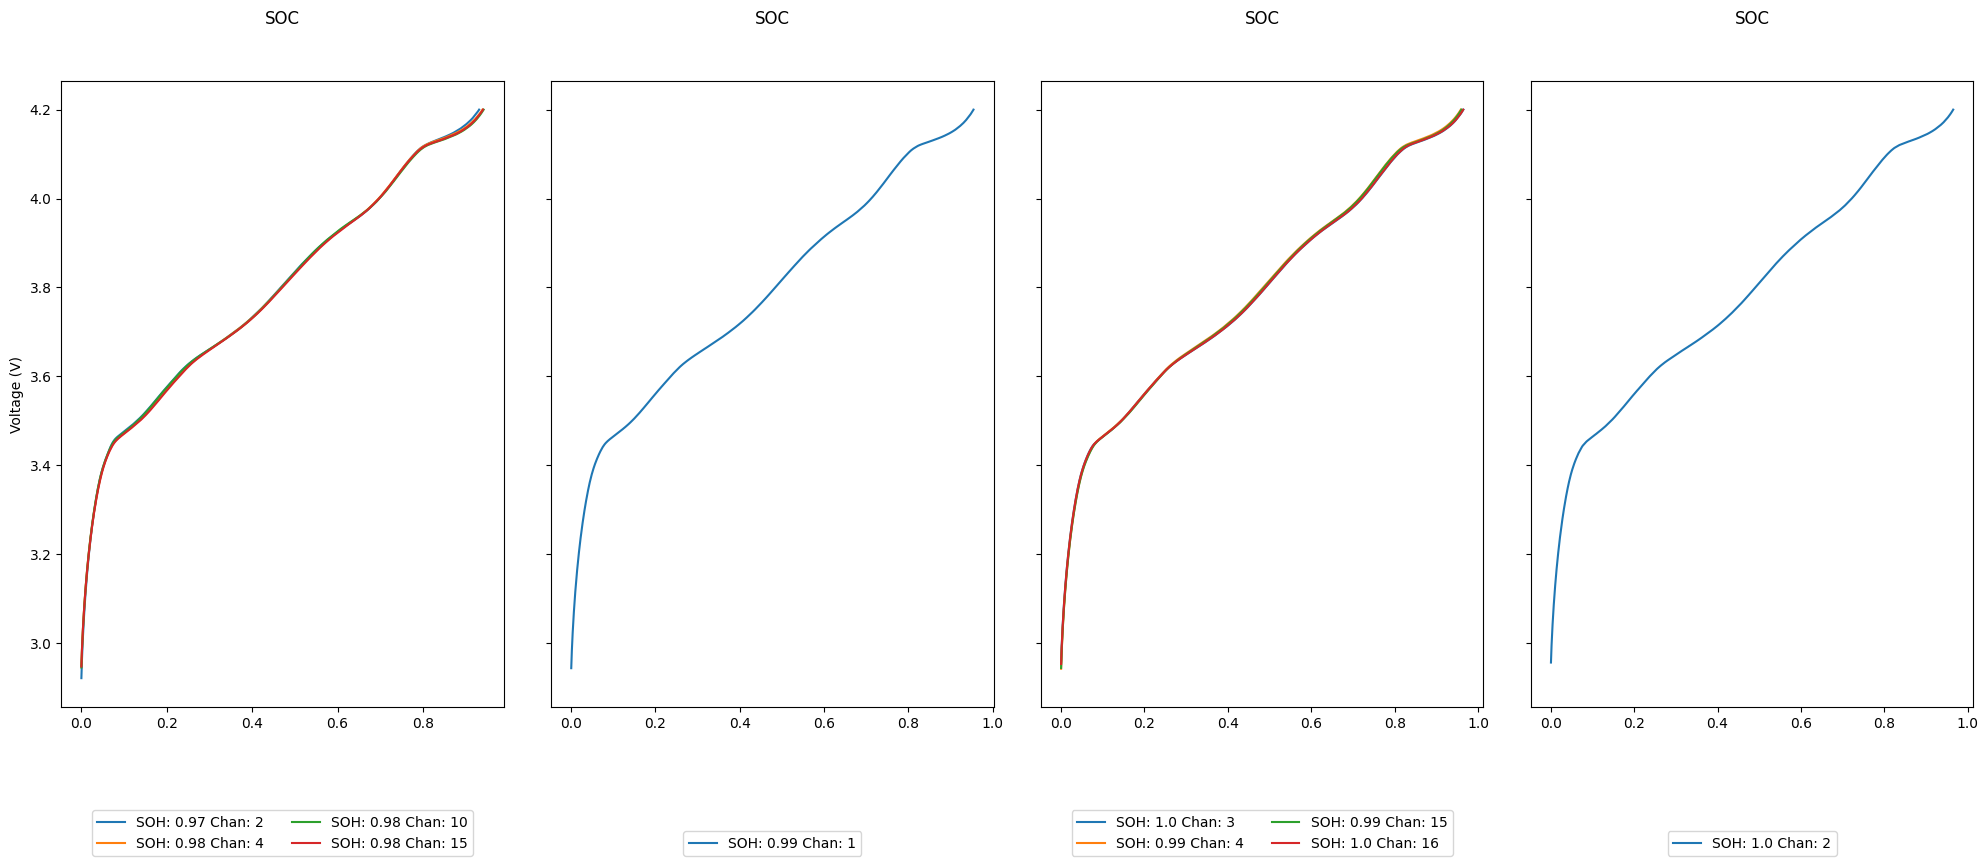

In [41]:
plot_ocv_array(step6_filtered,"Charge_Capacity(Ah)",4)